In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [8]:
path = "T1.csv"
df=pd.read_csv(path)
df.rename(columns={'Date/Time':'Time','LV ActivePower(kw)':'ActivePower(kw)',"Wind Speed(m/s)":"WindSpeed(m/s)","Wind Direction(°)":"Wind_Direction"},inplace=True)


In [9]:
df.head()

,Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [11]:
# Drop the 'Time' column
df.drop(columns=['Time'], inplace=True)

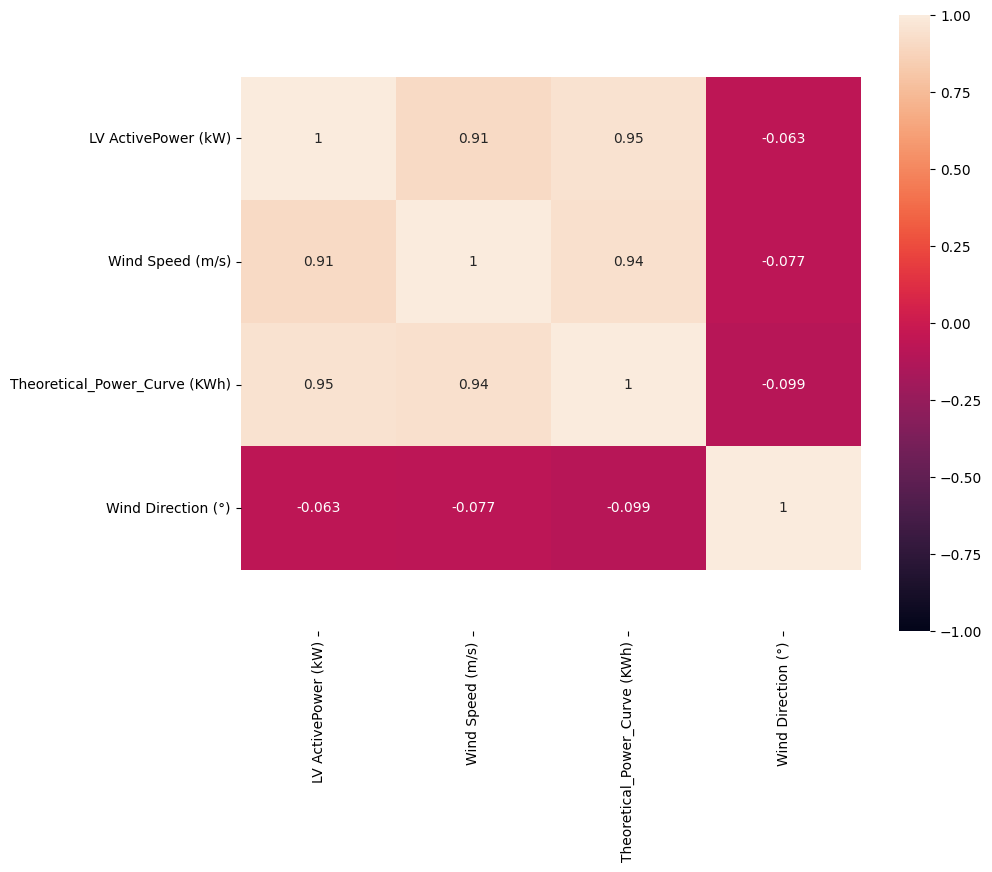

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


In [12]:
corr=df.corr()
plt.figure(figsize=(10,8))
ax=sns.heatmap(corr,vmin=-1,vmax=1,annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top - 0.5)
plt.show()
corr

In [13]:
df.drop(['Wind Direction (°)'],axis=1,inplace=True)

In [14]:
y=df['LV ActivePower (kW)']#'Theoretical_Power_Curve(kWh)'
x=df[['Theoretical_Power_Curve (KWh)','Wind Speed (m/s)']]#'ActivePower(kW)'

In [16]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y,test_size=0.2,random_state = 0)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
forest_model=RandomForestRegressor(max_leaf_nodes =500,random_state=1)
forest_model.fit(train_x, train_y)

RandomForestRegressor(max_leaf_nodes=500, random_state=1)

In [18]:
power_preds = forest_model.predict(val_x)
print(mean_absolute_error(val_y, power_preds))
print(r2_score(val_y,power_preds))

163.094719198876
0.9006092497625743


In [21]:
joblib.dump(forest_model, "power_prediction.sav")

['power_prediction.sav']

In [20]:
import requests
apikey = "43ce69715e2133b2300e0f8f7289befd" 
resp = requests.get("http://api.openweathermap.org/data/2.5/weather?q=London&appid="+apikey)
print (resp.json())
resp=resp.json()
temp = resp["main"]["temp"]
humid= resp["main"]["humidity"]
pressure = resp["main"]["pressure"]
humid = resp["wind"]["speed"]
print (temp, humid, pressure, humid)


{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 288.26, 'feels_like': 287.81, 'temp_min': 285.64, 'temp_max': 289.35, 'pressure': 1026, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 40}, 'clouds': {'all': 9}, 'dt': 1715112633, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1715055654, 'sunset': 1715110389}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}
288.26 3.09 1026 3.09
